In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [17]:
data=pd.read_csv('TSLA.CSV')

### Univeriate
### bivariate

1. Data Ingetion
2. EDA of the data
3. processing of the data
4. Model building
5. Model evaluation

### 1. Data ingetion
- import the required libraries
- load dataset
- load time series dataset into a pandas dataframe
- convert data column as datatime datatype
- set the datetime column sa the index of the dataframe

In [18]:
stock_data=data[['Date','Close']]

In [19]:
#univeriate time series analysis
stock_data

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [20]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [21]:
stock_data['Date']=pd.to_datetime(data['Date'])

In [22]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [23]:
stock_data=stock_data.set_index('Date')

In [24]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


### 2. EDA
- summary of the data, mean, median, mode, standard deviation,
- visualize the the time series data
- plot the time series data
- plot the rolling standard deviation of the time series
- Decompose the time series data series data check the trends, seasonality, and noise
- plot decompotion components for better understanding
- check the stationary
- check the stationarity of the time series data using the Augmented Dickey-fuller test
- check autocorrelation function (ACF) and partial autocorrelation (PCAF)
- detect and handle the outlier using statical methods or machine learning techniques

In [25]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


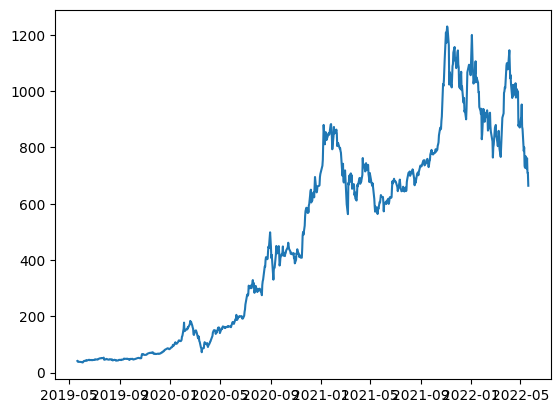

In [26]:
plt.plot(stock_data['Close'])

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

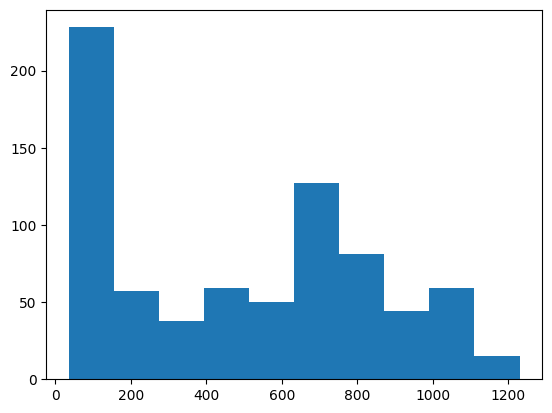

In [27]:
plt.hist(stock_data['Close'])

<Axes: xlabel='Close', ylabel='Density'>

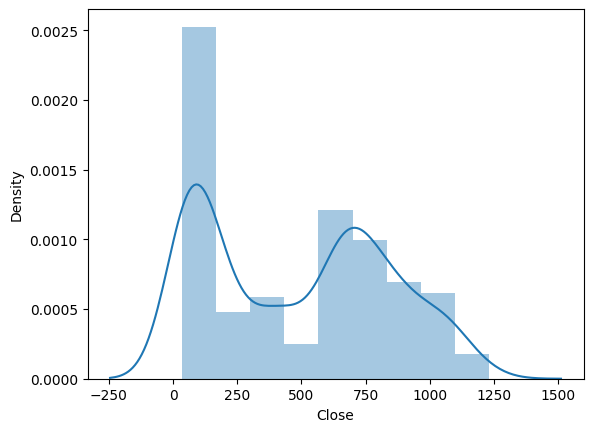

In [28]:
sns.distplot(stock_data['Close'])

Text(0.5, 1.0, 'tesla stock closing price')

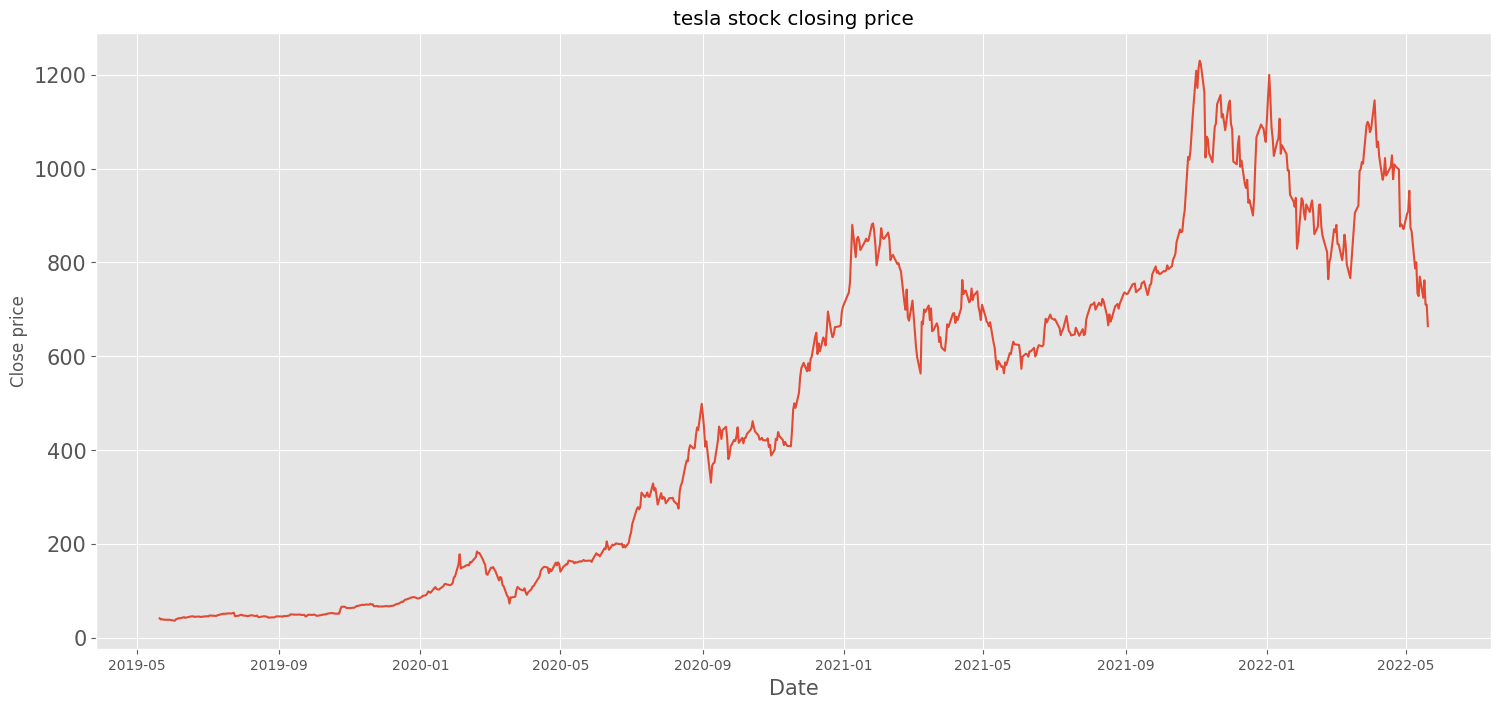

In [32]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.plot(stock_data['Close'])
plt.grid(True)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Close price")
plt.yticks(fontsize=15)
plt.title("tesla stock closing price",)

Text(0.5, 1.0, 'tesla stock closing price')

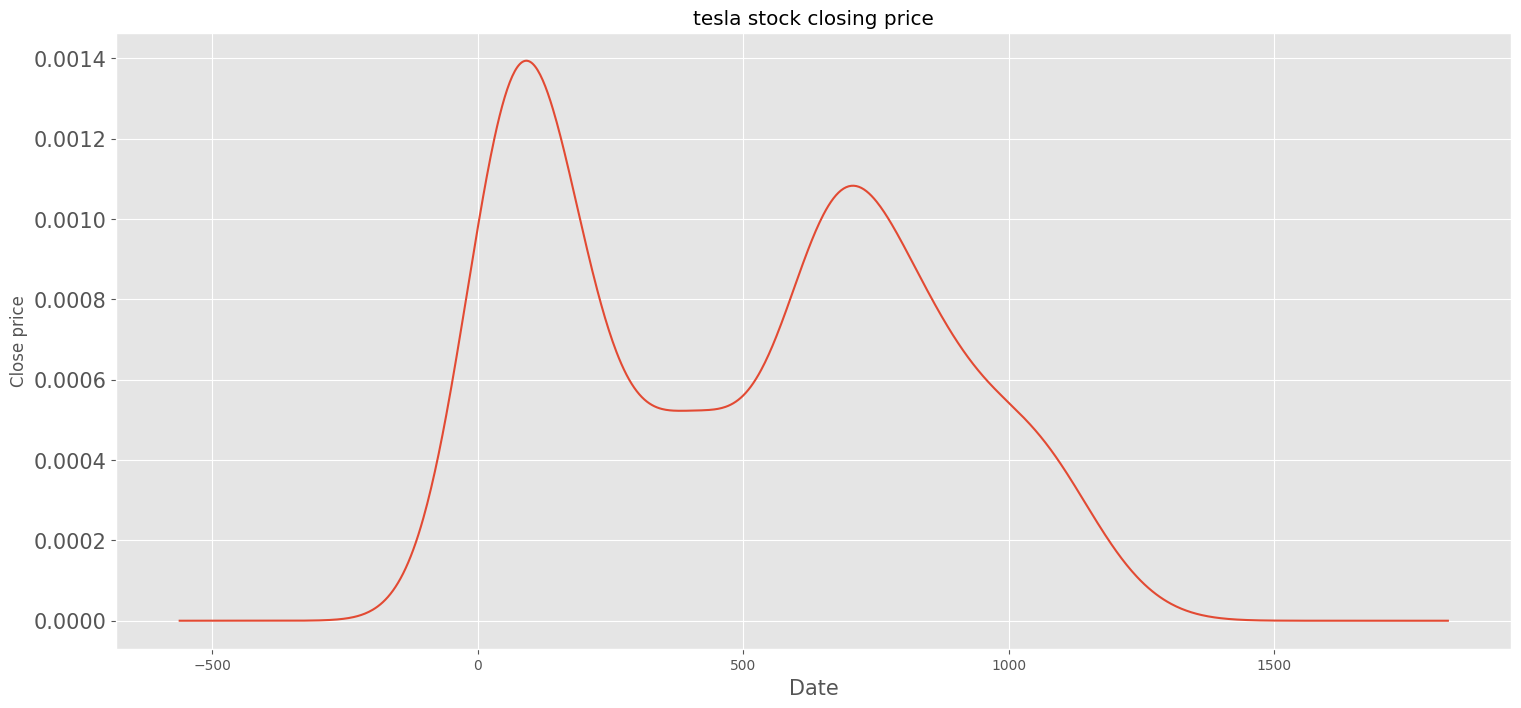

In [35]:
plt.figure(figsize=(18,8))
data['Close'].plot(kind="kde",)
plt.style.use('ggplot')
plt.grid(True)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Close price")
plt.yticks(fontsize=15)
plt.title("tesla stock closing price",)

### simple moving average

In [41]:
#this is for moving average (3)
stock_data['Close'].rolling(3).mean()

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23     39.553333
2019-05-24     38.590000
2019-05-28     38.321334
                 ...    
2022-05-16    740.653341
2022-05-17    751.856669
2022-05-18    731.929993
2022-05-19    726.946655
2022-05-20    694.376668
Name: Close, Length: 758, dtype: float64

In [42]:
stock_data['Close'].rolling(3).std()

Date
2019-05-21          NaN
2019-05-22          NaN
2019-05-23     1.296425
2019-05-24     0.487492
2019-05-28     0.699754
                ...    
2022-05-16    25.125547
2022-05-17    24.136242
2022-05-18    26.714694
2022-05-19    30.019958
2022-05-20    26.394268
Name: Close, Length: 758, dtype: float64

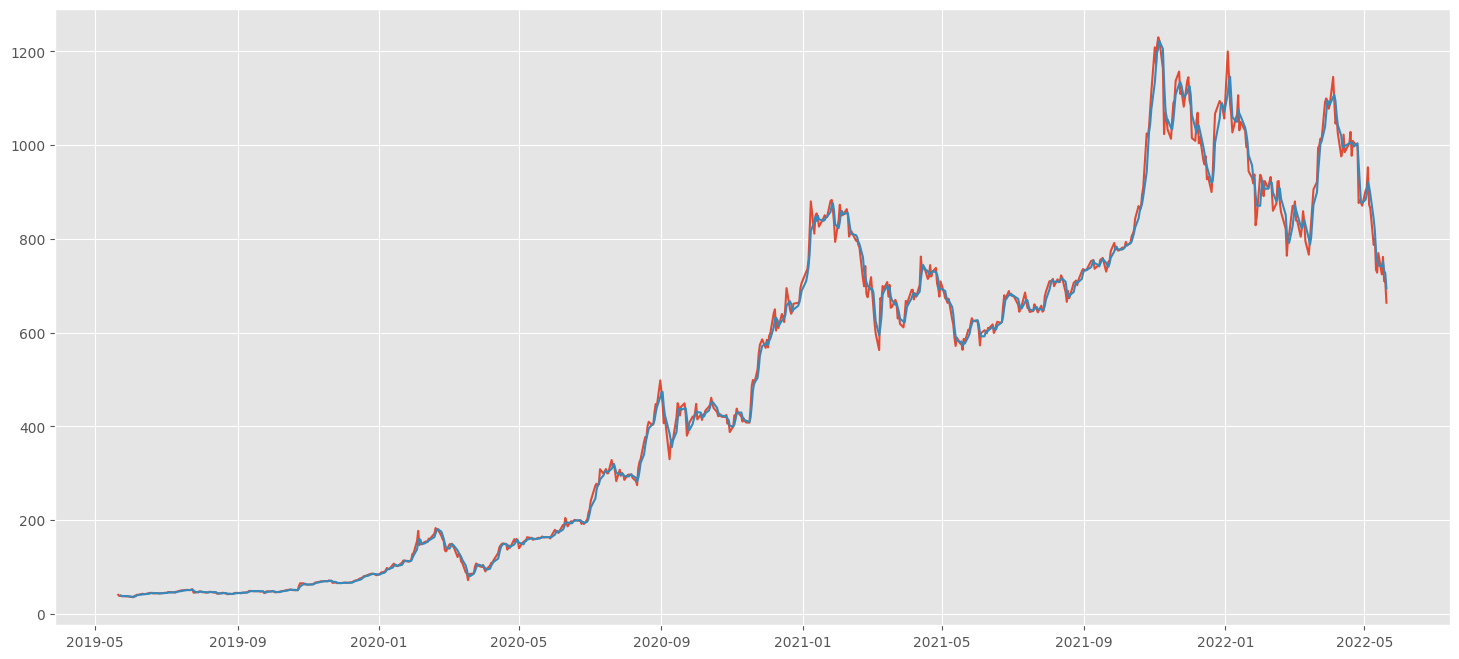

In [48]:
plt.figure(figsize=(18,8))
plt.plot(stock_data['Close'])
plt.plot(stock_data['Close'].rolling(3).mean())

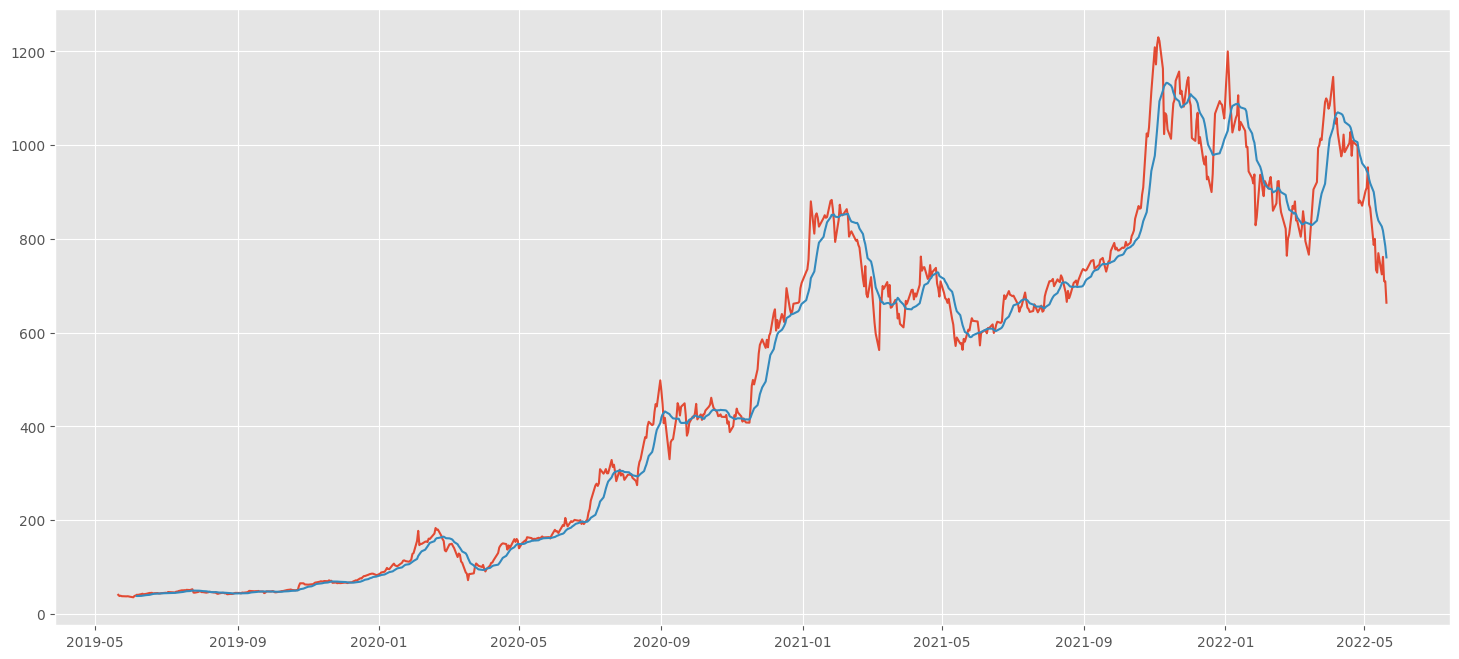

In [49]:
plt.figure(figsize=(18,8))
plt.plot(stock_data['Close'])
plt.plot(stock_data['Close'].rolling(12).mean())

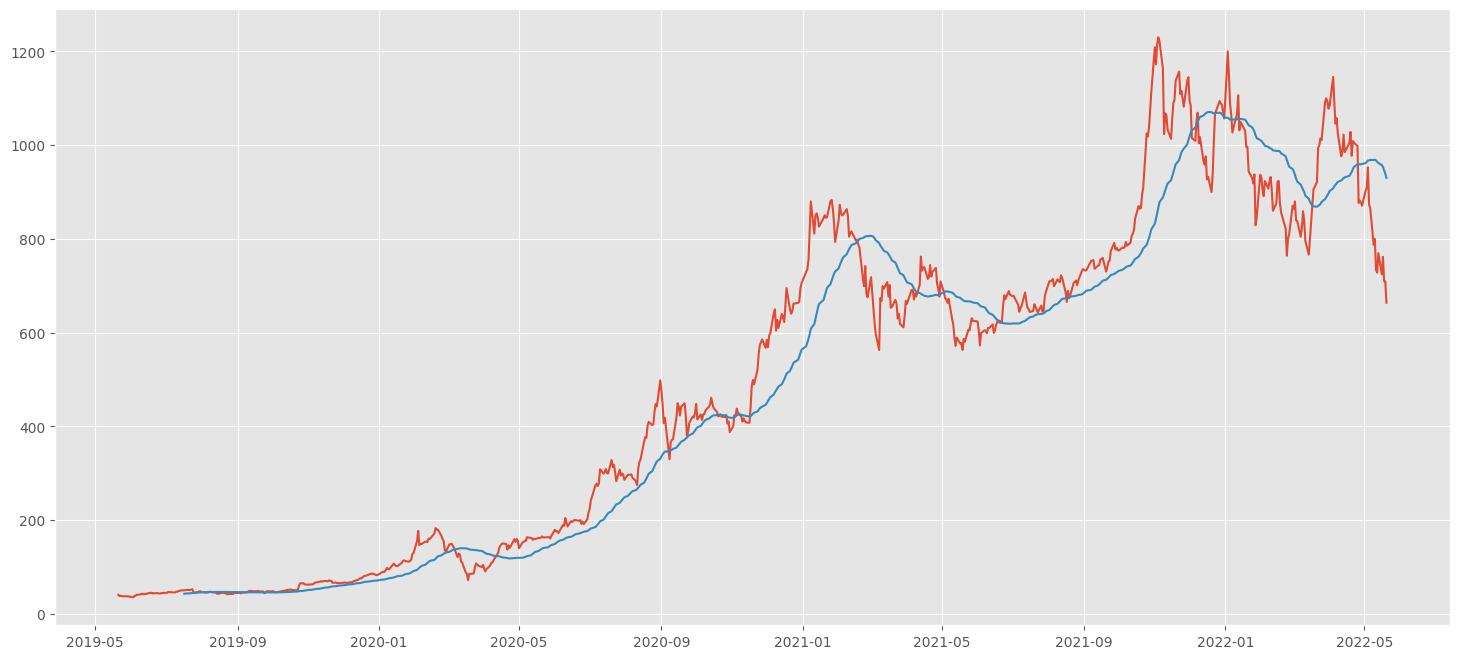

In [51]:
plt.figure(figsize=(18,8))
plt.plot(stock_data['Close'])
plt.plot(stock_data['Close'].rolling(40).mean())
# when increase the window size then graph is becoming smoother

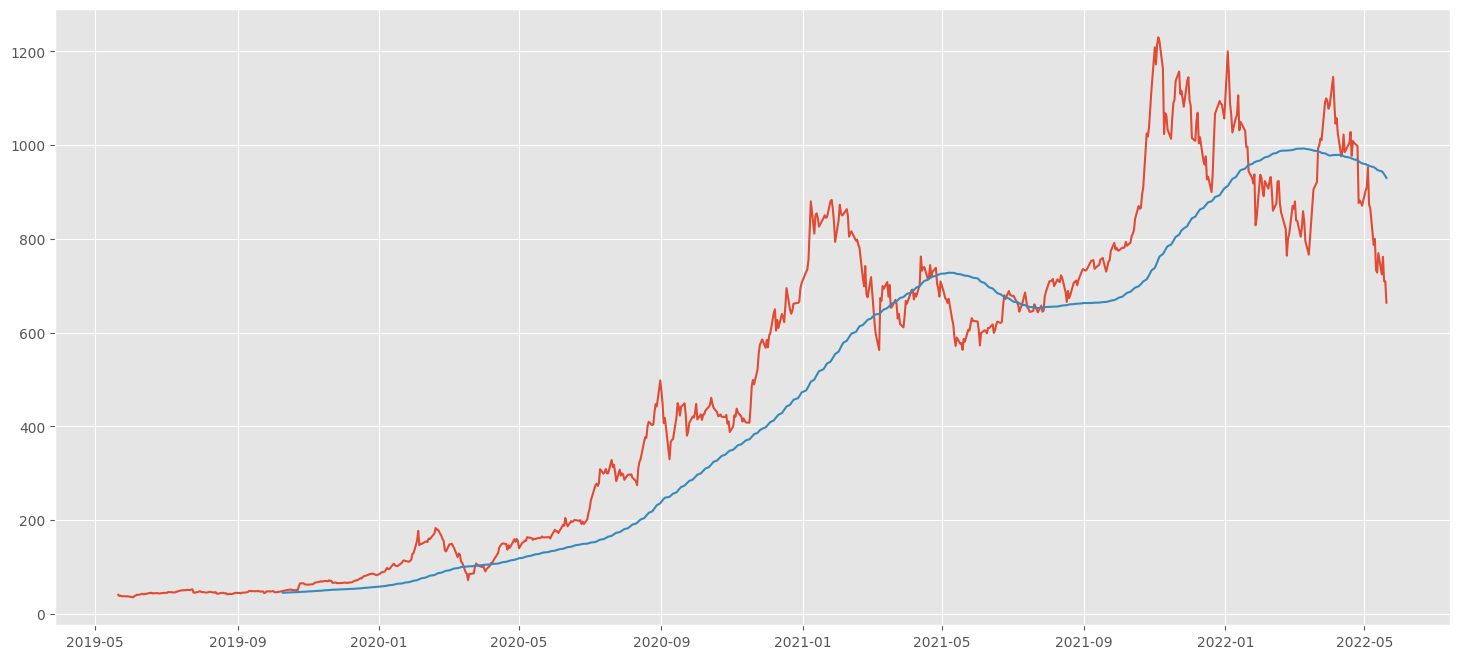

In [52]:
plt.figure(figsize=(18,8))
plt.plot(stock_data['Close'])
plt.plot(stock_data['Close'].rolling(100).mean())
# when increase the window size then graph is becoming smoother

### Data is stationary or not

In [53]:
from statsmodels.tsa.stattools import adfuller

In [54]:
adft=adfuller(stock_data['Close'])

In [55]:
adft

(-1.3630085817037507,
 0.5998762543050689,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [57]:
adft[0:4]
#this values is requared

(-1.3630085817037507, 0.5998762543050689, 9, 748)

In [58]:
pd.Series(adft[0:4],index=['test stats','p-vakue','lag','data point'])

test stats     -1.363009
p-vakue         0.599876
lag             9.000000
data point    748.000000
dtype: float64

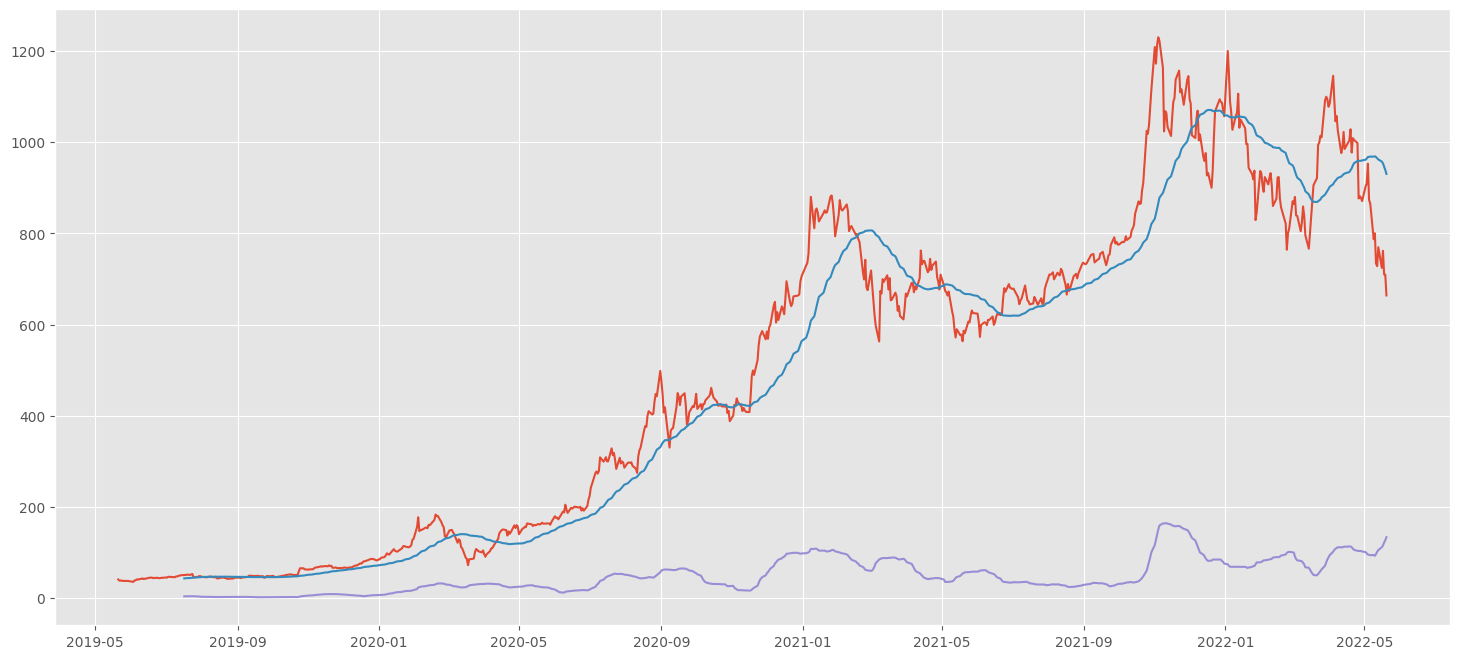

In [60]:
plt.figure(figsize=(18,8))
plt.plot(stock_data['Close'])
plt.plot(stock_data['Close'].rolling(40).mean())
plt.plot(stock_data['Close'].rolling(40).std())

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [64]:
result=seasonal_decompose(stock_data['Close'],period=30)

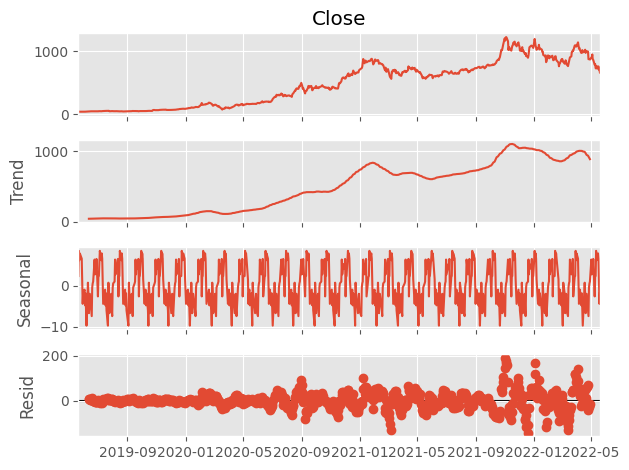

<Figure size 1800x800 with 0 Axes>

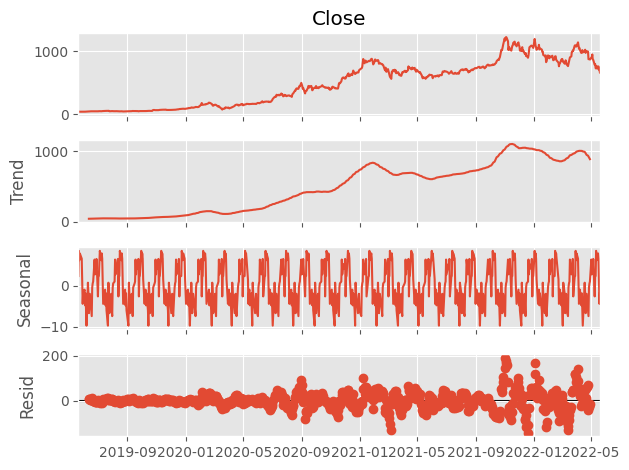

In [69]:
plt.figure(figsize=(18,8))
result.plot()


In [67]:
result.seasonal

Date
2019-05-21    2.317701
2019-05-22    8.439826
2019-05-23    6.163890
2019-05-24    7.817719
2019-05-28    6.539408
                ...   
2022-05-16    7.817719
2022-05-17    6.539408
2022-05-18    1.508873
2022-05-19   -4.468046
2022-05-20   -1.826385
Name: seasonal, Length: 758, dtype: float64

In [68]:
result.resid

Date
2019-05-21   NaN
2019-05-22   NaN
2019-05-23   NaN
2019-05-24   NaN
2019-05-28   NaN
              ..
2022-05-16   NaN
2022-05-17   NaN
2022-05-18   NaN
2022-05-19   NaN
2022-05-20   NaN
Name: resid, Length: 758, dtype: float64

<Axes: >

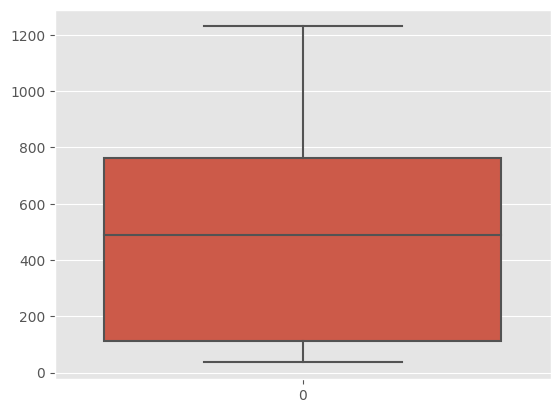

In [70]:
sns.boxplot(stock_data['Close'])

#### Auto correlation

In [72]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

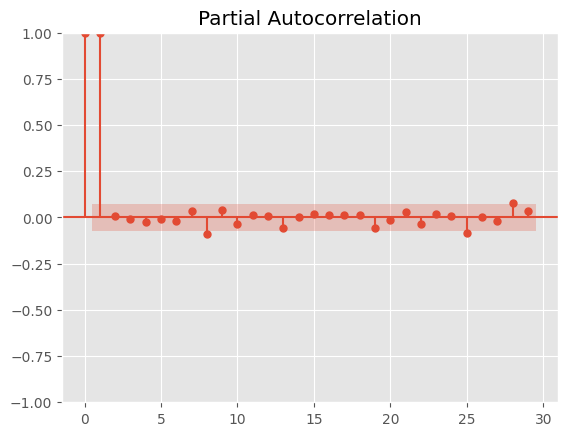

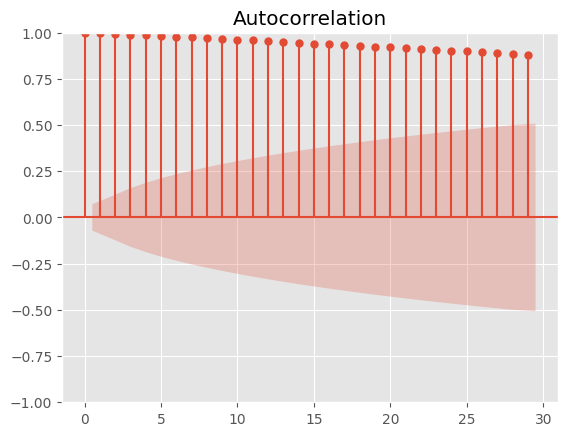

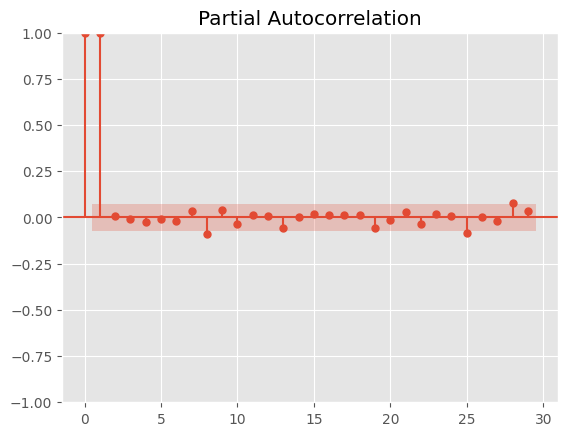

In [73]:
plot_acf(stock_data['Close'])
plot_pacf(stock_data['Close'])

### Data preprocessing of the time series data
- fill the missing values
- convert data into the stationary time series data
- if requare the normalize the data
- split the data into train and test
- clean the data removing the outlies

In [81]:
# first diferrense to converting to stationary data
tesla_df_close_diff_1=stock_data['Close'].diff(1)

In [83]:
tesla_df_close_diff_1=tesla_df_close_diff_1.dropna()

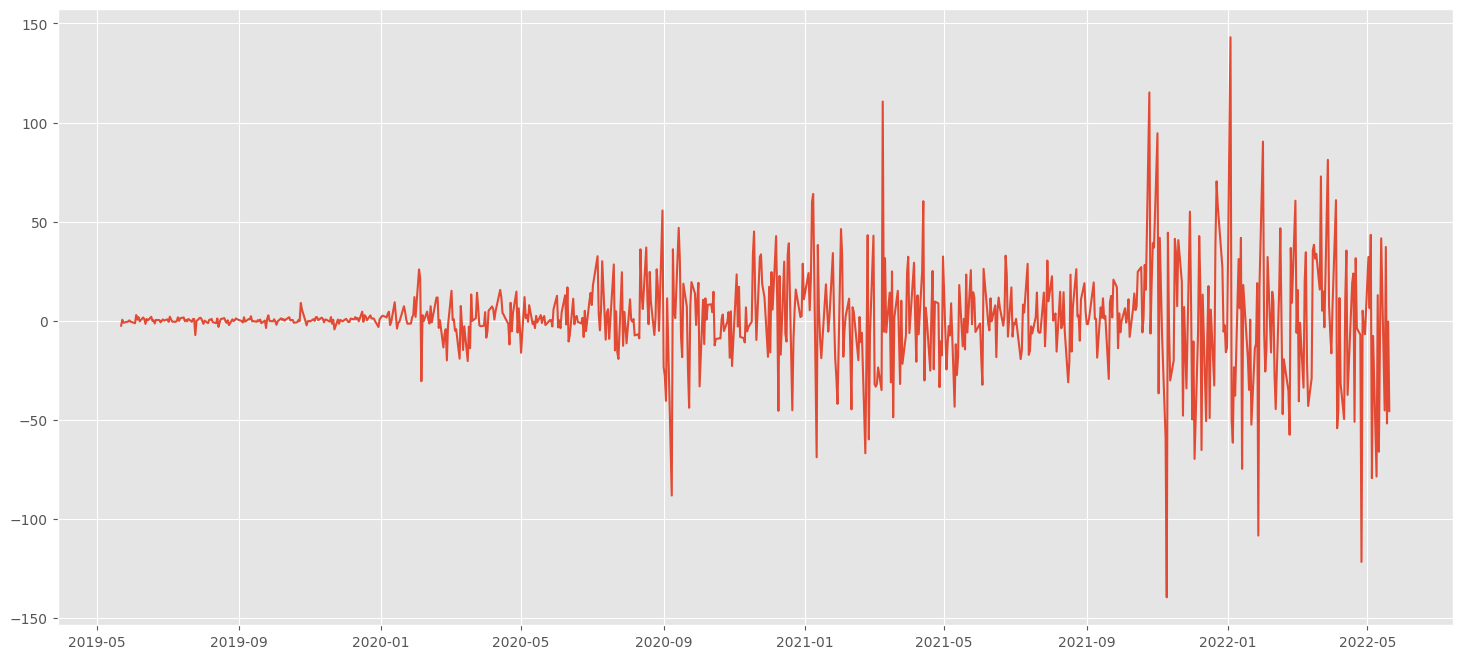

In [88]:
plt.figure(figsize=(18,8))
plt.plot(tesla_df_close_diff_1)

In [90]:
## second differense
tesla_df_close_diff_2=stock_data['Close'].diff(2)

In [92]:
tesla_df_close_diff_2=tesla_df_close_diff_2.dropna()

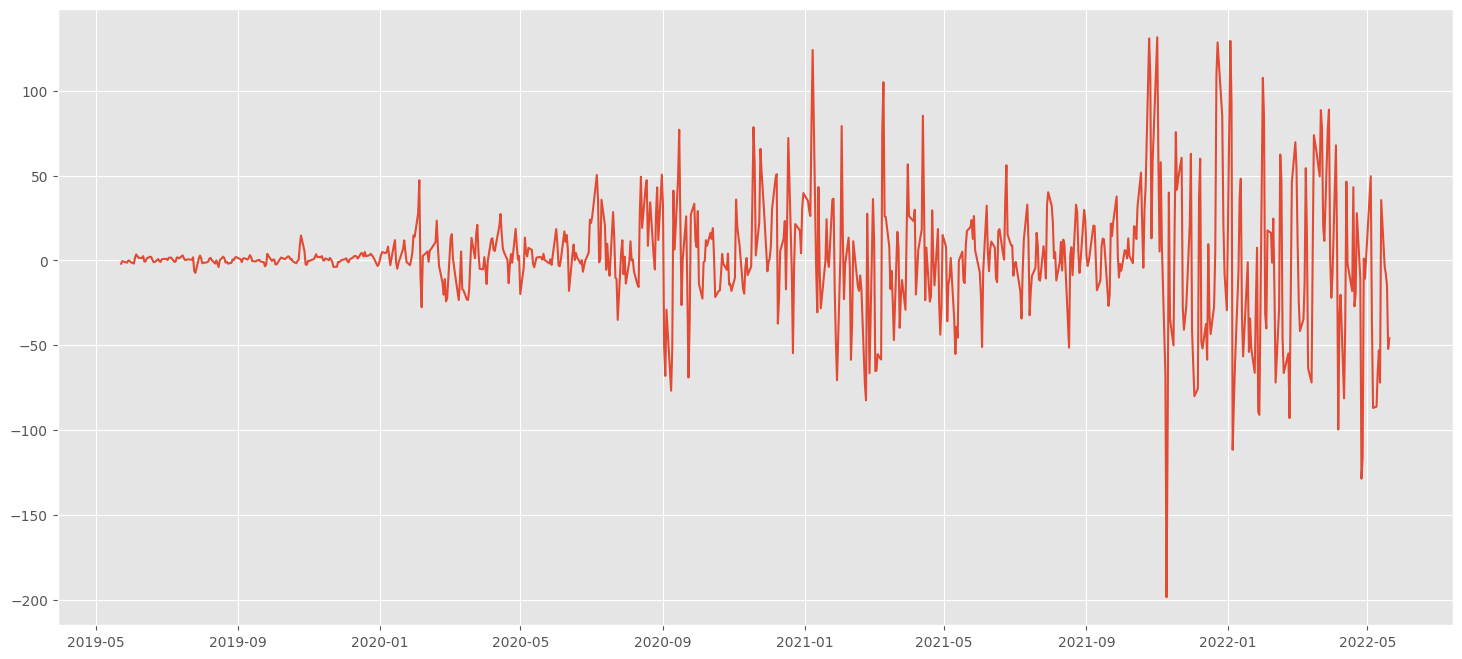

In [93]:
plt.figure(figsize=(18,8))
plt.plot(tesla_df_close_diff_2)

- in this case we get the stationary data in first defferencing so, no need to do second or third differencing

In [98]:
train_data=stock_data[0:-60]
test_data=stock_data[-60:]

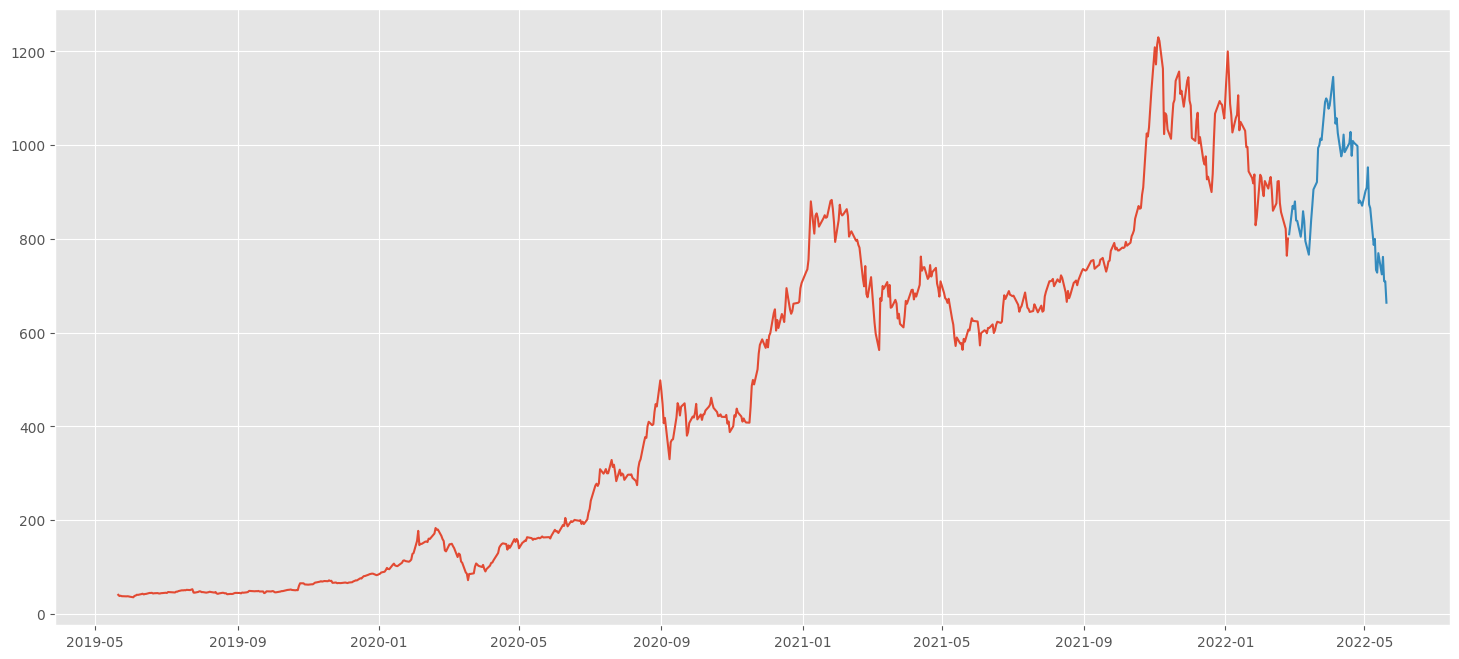

In [99]:
plt.figure(figsize=(18,8))
plt.plot(train_data['Close'])
plt.plot(test_data['Close'])

In [118]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [119]:
history=[x for x in train_data['Close']]

In [120]:
history

[41.01599884033203,
 38.54600143432617,
 39.09799957275391,
 38.1259994506836,
 37.7400016784668,
 37.97200012207031,
 37.64400100708008,
 37.03200149536133,
 35.79399871826172,
 38.720001220703125,
 39.31800079345703,
 41.18999862670898,
 40.900001525878906,
 42.57600021362305,
 43.41999816894531,
 41.85200119018555,
 42.78200149536133,
 42.98400115966797,
 45.00600051879883,
 44.948001861572266,
 45.2859992980957,
 43.92399978637695,
 44.37200164794922,
 44.72800064086914,
 43.95199966430664,
 43.854000091552734,
 44.56800079345703,
 44.69200134277344,
 45.43399810791016,
 44.90999984741211,
 46.97999954223633,
 46.619998931884766,
 46.06800079345703,
 46.012001037597656,
 47.78400039672852,
 47.720001220703125,
 49.01599884033203,
 50.70000076293945,
 50.47600173950195,
 50.97200012207031,
 50.70800018310547,
 51.63600158691406,
 51.13600158691406,
 52.03400039672852,
 52.97600173950195,
 45.76399993896485,
 45.608001708984375,
 47.15399932861328,
 48.45199966430664,
 48.32199859619

In [122]:
model=ARIMA(history,order=(1,1,1))

In [125]:
model=model.fit()

In [126]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  698
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3150.350
Date:                Tue, 04 Jul 2023   AIC                           6306.700
Time:                        23:34:54   BIC                           6320.340
Sample:                             0   HQIC                          6311.974
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2397      0.699      0.343      0.731      -1.129       1.609
ma.L1         -0.2713      0.690     -0.393      0.694      -1.623       1.080
sigma2       493.6767     11.690     42.231      0.000     470.765     516.588
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2111.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              31.69   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [127]:
model.forecast()[0]

800.2043834350637

In [129]:
test_data['Close'][0]

809.8699951171875

In [138]:
mean_squared_error([test_data['Close'][0]],[model.forecast()[0]])

93.42404918960744